In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/kunlin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def generate_gaussian(mu, sigma, rho):
    x = np.linspace(0, 99, 100)
    y = np.linspace(0, 99, 100)
    X, Y = np.meshgrid(x, y)

    mu_x, mu_y = mu
    sigma_x, sigma_y = sigma
    
    # Calculate the 2D Gaussian with non-diagonal covariance matrix
    Z = np.exp(
        -1 / (2 * (1 - rho**2)) * (
            ((X - mu_x)**2 / sigma_x**2) +
            ((Y - mu_y)**2 / sigma_y**2) -
            (2 * rho * (X - mu_x) * (Y - mu_y) / (sigma_x * sigma_y))
        )
    )
    Z /= Z.sum()
    assert abs(Z.sum() - 1.0) < 1e-10, f"{Z.sum()}"
    return Z

In [3]:
dist1 = generate_gaussian([50, 50], [10, 20], 0.5)

In [4]:
dist2 = generate_gaussian([30, 60], [5, 10], -0.3)

In [5]:
def plot_peak(d):
    max_y, max_x = np.unravel_index(d.argmax(), d.shape)
    plt.scatter(max_x, max_y, marker='x')

def plot_fuse(dist):
    plt.figure(figsize=(10, 10))
    plt.subplot(221)
    plt.contourf(dist1)
    plot_peak(dist1)
    plt.title("PMF 1")
    plt.axis('equal')
    plt.axis('off')
    
    plt.subplot(222)
    plt.contourf(dist2)
    plot_peak(dist2)
    plt.axis('equal')
    plt.title("PMF 2")
    plt.axis('off')
    
    plt.subplot(223)
    plt.contourf(dist)
    plt.contourf(dist1, alpha=0.3, cmap='gray')
    plt.contourf(dist2, alpha=0.3, cmap='gray')
    plot_peak(dist1)
    plot_peak(dist2)
    plot_peak(dist)
    plt.title("PMF overlay w/ combined distribution")
    plt.axis('equal')
    plt.axis('off')

    plt.subplot(224)
    plt.contourf(dist)
    plot_peak(dist)
    plt.title("Combined two independent distributions")
    plt.axis('equal')
    plt.axis('off')

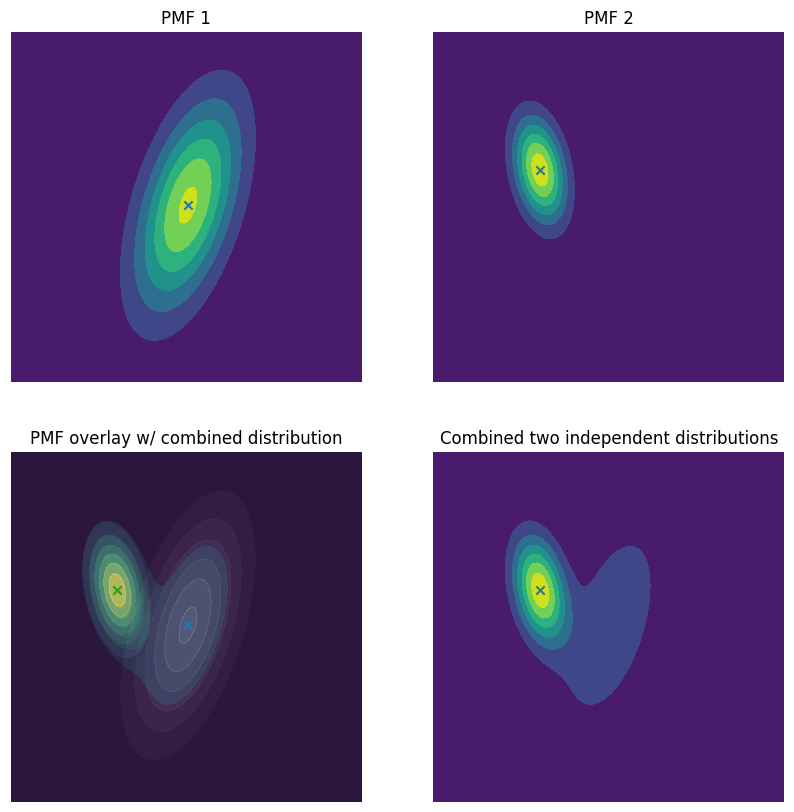

In [6]:
def get_arith_mean(alpha):
    arith_mean = (1 - alpha) * dist1 + alpha * dist2
    arith_mean /= arith_mean.sum()
    return arith_mean
plot_fuse(get_arith_mean(0.5))

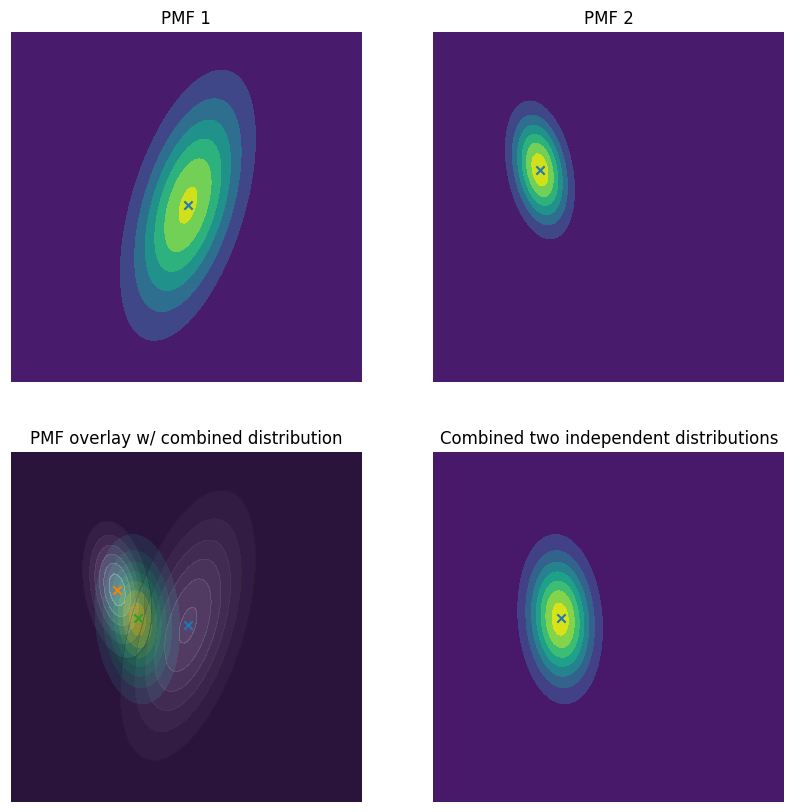

In [7]:
def get_geom_mean(gamma):
    geom_mean = dist1 ** (1 - gamma) * dist2 ** gamma
    geom_mean /= geom_mean.sum()
    return geom_mean
plot_fuse(get_geom_mean(0.5))

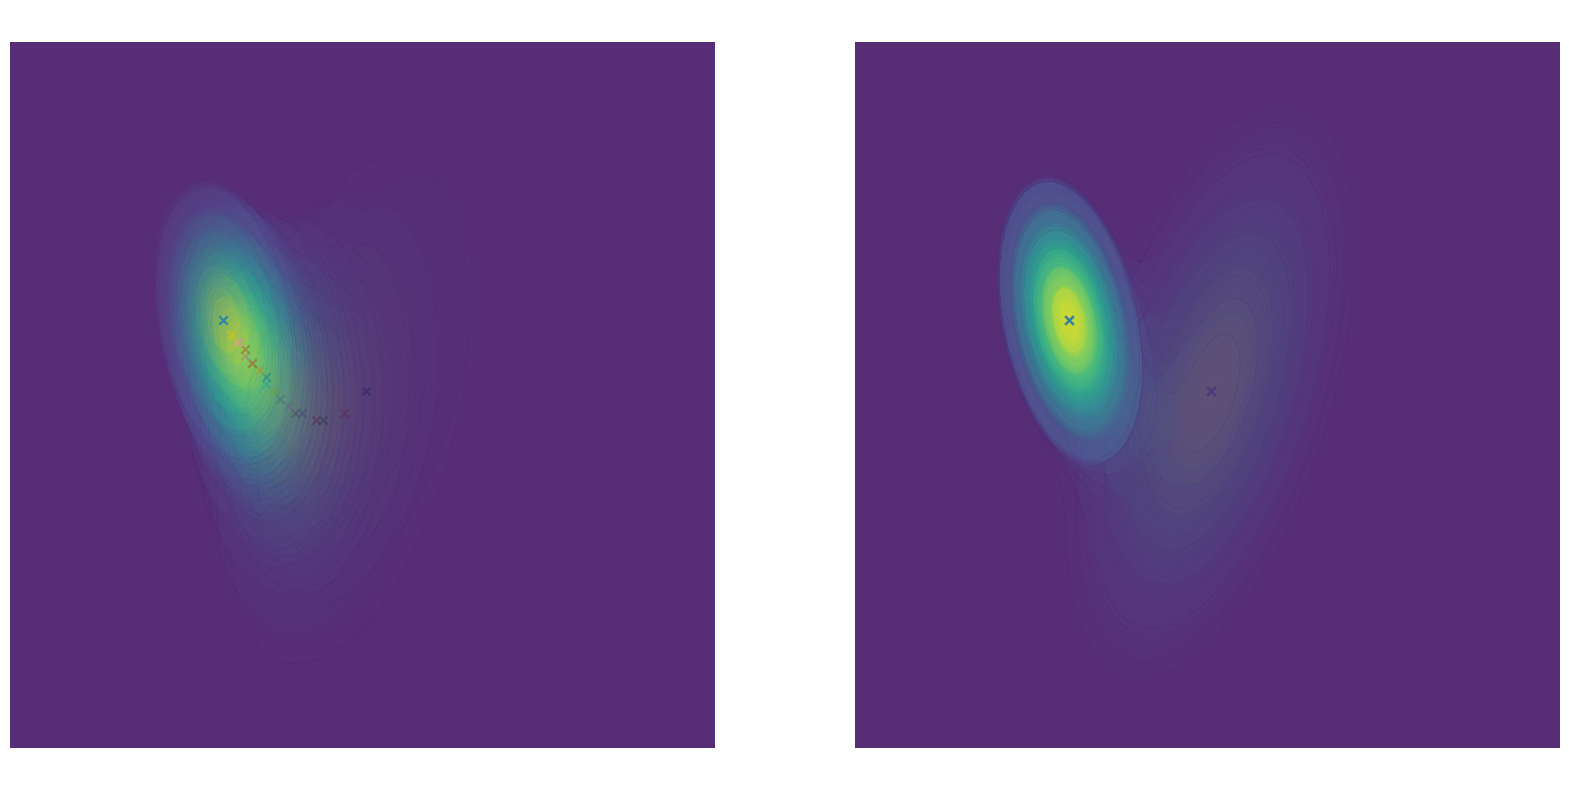

In [8]:
plt.figure(figsize=(20, 10))
for i, step in enumerate(np.arange(0.0, 1.0 + 1e-10, 0.05)):
    geom_mean = get_geom_mean(step)
    plt.subplot(121)
    plot_peak(geom_mean)
    plt.contourf(geom_mean, alpha=0.1)
    plt.axis('equal')
    plt.axis('off')

    plt.subplot(122)
    arith_mean = get_arith_mean(step)
    plot_peak(arith_mean)
    plt.contourf(arith_mean, alpha=0.1)
    plt.axis('equal')
    plt.axis('off')

In [9]:
def get_geom_mean2(rho):
    log_d1 = np.log(dist1)
    log_d2 = np.log(dist2)
    log_d = (1 - rho) * log_d1 + rho * log_d2
    d = np.exp(log_d)
    d /= d.sum()
    return d

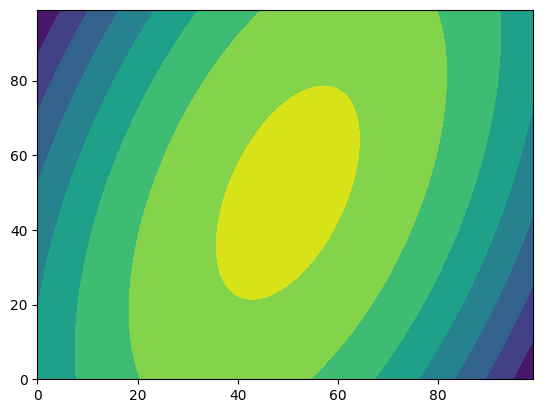

In [10]:
plt.contourf(np.log(dist1))

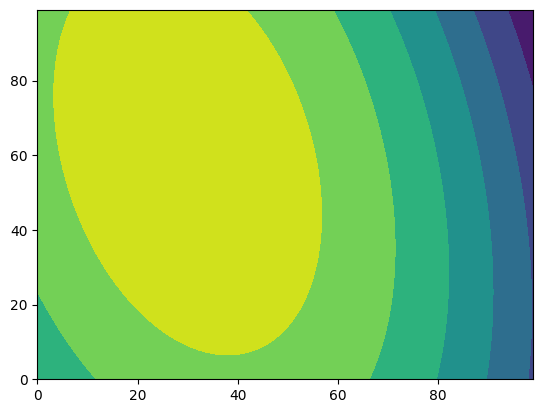

In [11]:
plt.contourf(np.log(dist2))

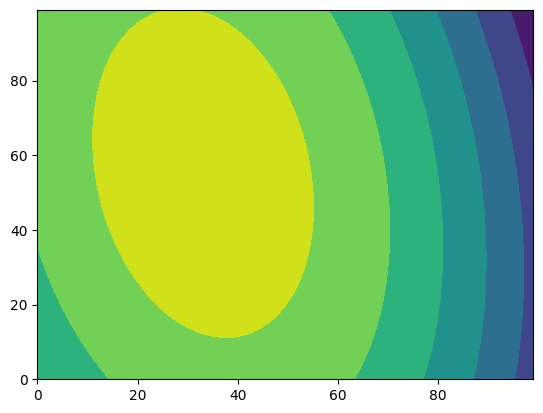

In [12]:
plt.contourf(0.3 * np.log(dist1) + 0.7 * np.log(dist2))

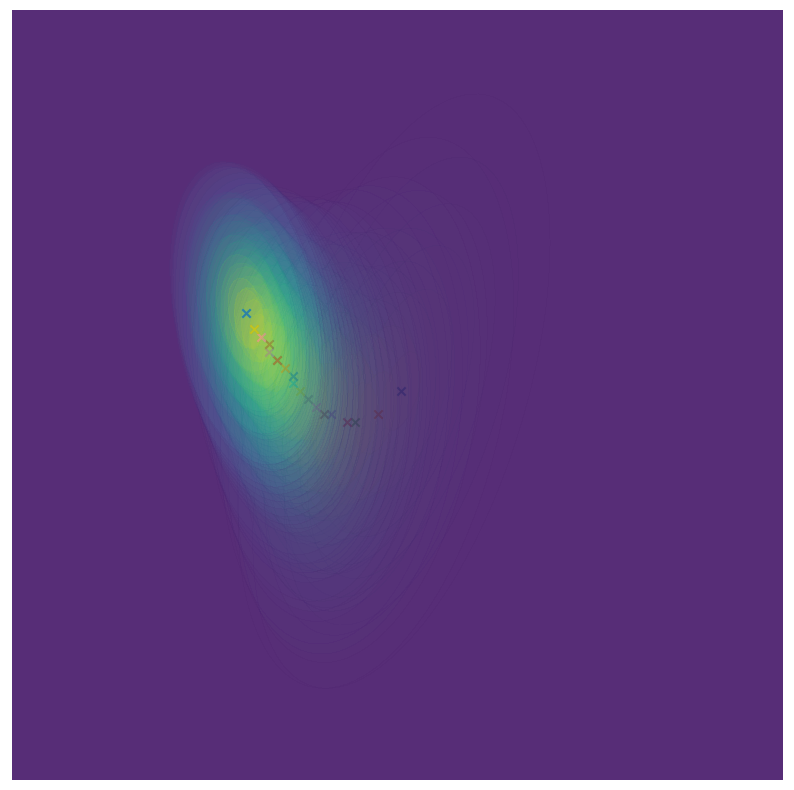

In [13]:
plt.figure(figsize=(10, 10))
for i, step in enumerate(np.arange(0, 1.0 + 1e-10, 0.05)):
    geom_mean = get_geom_mean2(step)
    plot_peak(geom_mean)
    plt.contourf(geom_mean, alpha=0.1)
    plt.axis('equal')
    plt.axis('off')